In [2]:
# Read in SQL analysis file

from google.colab import files
uploaded = files.upload()


Saving promo_analysis_sql.csv to promo_analysis_sql.csv


In [3]:
import pandas as pd

df = pd.read_csv("promo_analysis_sql.csv")
df

,week,retailer,region,product_id,promo_type,avg_base_units,incremental_units,base_price,discount_pct,promo_price,incremental_revenue,trade_spend,promo_roi
0,1/7/2024,Walmart,Northeast,4,BOGO,608.62,0.00,4.99,0.19,4.04,0.00,1248.15,0.00
1,1/7/2024,Kroger,South,3,Feature,791.00,0.00,4.99,0.11,4.44,0.00,2692.45,0.00
2,1/7/2024,Kroger,Midwest,3,Feature,614.86,0.00,4.99,0.11,4.44,0.00,2692.45,0.00
3,1/7/2024,Kroger,Midwest,4,BOGO,625.22,0.00,4.99,0.18,4.09,0.00,2878.95,0.00
4,1/7/2024,Kroger,West,4,BOGO,773.53,73.47,4.99,0.18,4.09,300.63,2878.95,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,12/22/2024,Publix,Midwest,4,Feature,786.32,195.68,4.99,0.16,4.19,820.19,3938.43,0.21
363,12/29/2024,Publix,South,3,TPR,730.17,434.83,4.99,0.25,3.74,1627.35,4580.90,0.36
364,12/29/2024,Publix,Midwest,4,Display,786.32,0.00,4.99,0.16,4.19,0.00,3549.57,0.00
365,12/29/2024,Publix,West,3,TPR,727.56,17.44,4.99,0.25,3.74,65.26,4580.90,0.01


In [4]:
# Which retailer and promo type combination yields the most incremental revenue and promo ROI.

roi_summary = (
    df.groupby(["retailer", "promo_type"])
      .agg(
          total_incremental_revenue=("incremental_revenue", "sum"),
          total_trade_spend=("trade_spend", "sum")
      )
      .reset_index()
)

roi_summary["promo_roi"] = (
    roi_summary["total_incremental_revenue"] /
    roi_summary["total_trade_spend"]
)

roi_summary

,retailer,promo_type,total_incremental_revenue,total_trade_spend,promo_roi
0,Kroger,BOGO,5927.70,55618.76,0.106577
1,Kroger,Display,13137.60,87682.62,0.149831
2,Kroger,Feature,3476.46,39413.97,0.088204
3,Kroger,TPR,1257.62,34348.42,0.036614
4,Publix,BOGO,10051.69,54894.12,0.183111
5,Publix,Display,4650.70,54787.24,0.084887
6,Publix,Feature,16317.76,120607.39,0.135297
7,Publix,TPR,10982.66,108866.91,0.100882
8,Target,BOGO,14939.93,96100.13,0.155462
9,Target,Display,6141.91,62935.96,0.097590


In [5]:
# Which discount percentage yeilds the hoghest average ROI.

discount_lift = (
    df.groupby("discount_pct")
      .agg(
          avg_incremental_units=("incremental_units", "mean"),
          avg_roi=("promo_roi", "mean")
      )
      .reset_index()
)

discount_lift

,discount_pct,avg_incremental_units,avg_roi
0,0.10,249.820000,0.145000
1,0.11,30.388667,0.031333
2,0.12,117.361667,0.135000
3,0.13,201.132500,0.560000
4,0.14,134.648889,0.150000
5,0.15,165.644167,0.328333
6,0.16,201.288000,0.234000
7,0.17,110.245500,0.168500
8,0.18,229.305455,0.220000
9,0.19,100.893333,0.080000


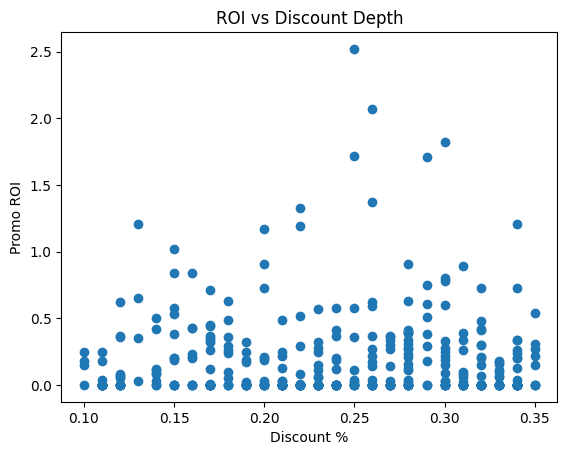

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df["discount_pct"], df["promo_roi"])
plt.xlabel("Discount %")
plt.ylabel("Promo ROI")
plt.title("ROI vs Discount Depth")
plt.show()